In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.optimize import fmin_l_bfgs_b
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [4, 3]

In [2]:
x = np.linspace(0,2*np.pi, 100)
tic1 = np.sin(x)
tic2 = np.cos(x)

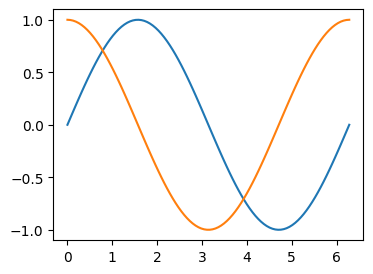

In [3]:
plt.plot(x, tic1)
plt.plot(x, tic2)

In [6]:
# as return is sin and cos, Their best alpha factor is drivate function cos and -sin 
# as the returns animate the price, the price is not below to zero, add constant value 
frame = {}
for time in range(1,100+1):
    tic1[time-1] += 1.1
    tic2[time-1] += 1.1
    data = np.array([[np.cos(x[time-1]), -np.sin(x[time-1])],[tic1[time-1], tic2[time-1]]])
    frame[time] = pd.DataFrame(data.T, index=['A', 'B'], columns=['factor', 'returns'])
frame[1]['h_privious'] = 0
frame[1]

,factor,returns,h_privious
A,1.0,1.1,0
B,-0.0,2.1,0


In [7]:
# the lambda expressed a velocity to transfer position, as position expressed by persent from 0 to 1, it is better to set 1-5
def get_obj_func(h0, rAB, Lambda=3.): 
    def obj_func(h):
        f = -np.matmul(rAB ,h) + np.sum(Lambda*(h-h0.T)**2)
        return f
    return obj_func

def get_grad_func(h0, rAB, Lambda=3.):
    def grad_func(h):
        f_hat = -rAB + 2 * np.sum(Lambda * (h - h0.T))
        return f_hat
    return grad_func

In [9]:
# bounds means position bounds at each row. Here I only trade for long so that bounds from 0 to 1
h0 = frame[1]['h_privious'].values
bounds = [(0,1)]*frame[1].shape[0]
for i in range(1,100+1):
    obj_func = get_obj_func(h0, frame[i]['factor'])
    grad_func = get_grad_func(h0, frame[i]['factor'])
    h_optimal, min_val, _ = fmin_l_bfgs_b(obj_func, h0, fprime=grad_func, bounds=bounds)
    #h_optimal, min_val, _ = fmin_l_bfgs_b(obj_func, h0, fprime=grad_func)
    
    frame[i]['h_opt'] = h_optimal
    frame[i]['h_privious'] = h0
    h0 = h_optimal
frame[100]

,factor,returns,h_opt,h_privious
A,1.000000e+00,1.1,1.0,1.0
B,2.449294e-16,2.1,1.0,1.0


In [10]:
h_optimal_list = [frame[i]['h_opt'] for i in range(1, 100+1) ]
h_privious_list = [frame[i]['h_privious'] for i in range(1, 100+1) ]

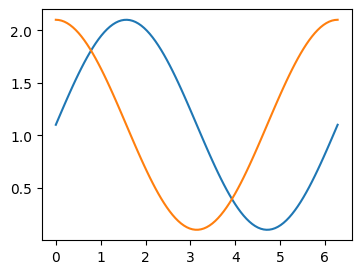

In [11]:
plt.plot(x, tic1)
plt.plot(x, tic2)

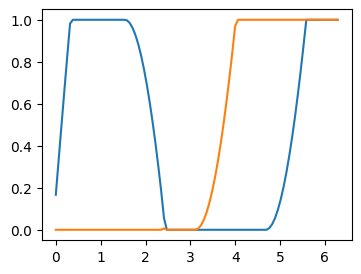

In [12]:
plt.plot(x, h_optimal_list)